Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great attention to minute details. He has been keeping logs of every time he charged his laptop, which includes how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his activities after watching his TV shows accordingly.

**Challenge**

You are given access to Fred’s laptop charging log by reading from the file “trainingdata.txt”. The training data file will consist of 100 lines, each with 2 comma-separated numbers.

The first number denotes the amount of time the laptop was charged.
The second number denotes the amount of time the battery lasted.
The training data file can be downloaded here (this will be the same training data used when your program is run). The input for each of the test cases will consist of exactly 1 number rounded to 2 decimal places. For each input, output 1 number: the amount of time you predict his battery will last.

**Scoring**

Your score will be 10-X, where X is the sum of the distances you are from expected answer of each test case. For instance if there are 2 test cases with expected answer 4 and you print 3 for the first one and 6 for the second one your score will be 10-(1+2) = 7.

In [32]:
import pandas as pd
from io import StringIO
import requests
import math
import os
import random
import re
import sys
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
# URL of the file
url = "https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.text
    print("File content:\n", data)
else:
    print("Failed to retrieve the file. Status code:", response.status_code)


File content:
 2.81,5.62
7.14,8.00
2.72,5.44
3.87,7.74
1.90,3.80
7.82,8.00
7.02,8.00
5.50,8.00
9.15,8.00
4.87,8.00
8.08,8.00
5.58,8.00
9.13,8.00
0.14,0.28
2.00,4.00
5.47,8.00
0.80,1.60
4.37,8.00
5.31,8.00
0.00,0.00
1.78,3.56
3.45,6.90
6.13,8.00
3.53,7.06
4.61,8.00
1.76,3.52
6.39,8.00
0.02,0.04
9.69,8.00
5.33,8.00
6.37,8.00
5.55,8.00
7.80,8.00
2.06,4.12
7.79,8.00
2.24,4.48
9.71,8.00
1.11,2.22
8.38,8.00
2.33,4.66
1.83,3.66
5.94,8.00
9.20,8.00
1.14,2.28
4.15,8.00
8.43,8.00
5.68,8.00
8.21,8.00
1.75,3.50
2.16,4.32
4.93,8.00
5.75,8.00
1.26,2.52
3.97,7.94
4.39,8.00
7.53,8.00
1.98,3.96
1.66,3.32
2.04,4.08
11.72,8.00
4.64,8.00
4.71,8.00
3.77,7.54
9.33,8.00
1.83,3.66
2.15,4.30
1.58,3.16
9.29,8.00
1.27,2.54
8.49,8.00
5.39,8.00
3.47,6.94
6.48,8.00
4.11,8.00
1.85,3.70
8.79,8.00
0.13,0.26
1.44,2.88
5.96,8.00
3.42,6.84
1.89,3.78
1.98,3.96
5.26,8.00
0.39,0.78
6.05,8.00
1.99,3.98
1.58,3.16
3.99,7.98
4.35,8.00
6.71,8.00
2.58,5.16
7.37,8.00
5.77,8.00
3.97,7.94
3.65,7.30
4.38,8.00
8.06,8.00
8.05,8.00
1.10

In [34]:
# Load data into a DataFrame
df = pd.read_csv(StringIO(data), header=None)
df = df.rename(columns={0: "charge_time", 1: "battery_time"})

Text(0, 0.5, 'battery_time')

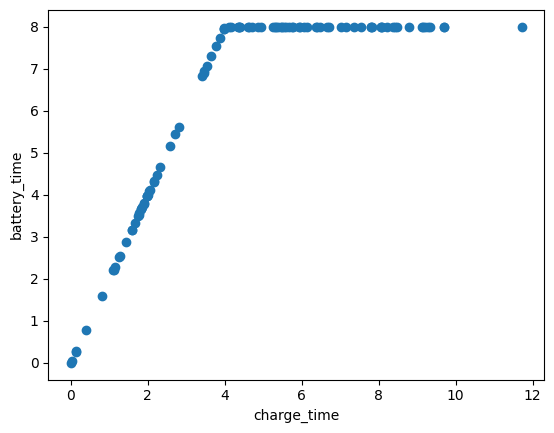

In [35]:
#plot between charge_time and battery_time
import matplotlib.pyplot as plt

plt.scatter(df['charge_time'], df['battery_time'])
plt.xlabel('charge_time')
plt.ylabel('battery_time')

In [36]:
# Step 2: Cap battery life strictly below 8.0
df = df[df["battery_time"] < 8.0]

In [37]:
# Step 3: Train a linear regression model
X = df["charge_time"].values.reshape(-1, 1)  # Feature: Charging Time
y = df["battery_time"].values  # Target: Battery Life

In [38]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [39]:
# Step 4: Define the prediction function
def predict_battery_life(charging_time):
    # Cap at 8.0 for times exceeding the maximum observed value
    if charging_time > df["charge_time"].max():
        return 8.0
    prediction = model.predict([[charging_time]])
    return round(float(prediction[0]), 2)

In [40]:
# Step 5: Read the input, predict, and print the result
if __name__ == "__main__":
    timeCharged = float(input().strip())
    if timeCharged < 0:
        print("Charging time cannot be negative.")
    else:
        result = predict_battery_life(timeCharged)
        print(result)

1.50
3.0
